In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd. set_option("display.max_rows", 100, "display.max_columns", 100)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [19]:
data.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [17]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
data.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [32]:
((data.isnull().sum()/1460)*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageQual        5.547945
GarageCond        5.547945
GarageFinish      5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtCond          2.534247
BsmtFinType1      2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
BsmtFullBath      0.000000
Functional        0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
FullBath          0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BsmtHalfBath      0.000000
Id                0.000000
LowQualFinSF      0.000000
GarageCars        0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [15]:
data.shape

(1460, 81)

In [22]:
data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [23]:
data['Alley'] = np.where(data['Alley'] == 'Pave', 1, 
                        np.where(data['Alley'] == 'Grvl', 2, 3))

In [33]:
data.drop(['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1, inplace= True)

In [34]:
data

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,3,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,3,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,3,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,3,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,3,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,3,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,3,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,3,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,3,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [35]:
((data.isnull().sum()/1460)*100).sort_values(ascending=False)

GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
KitchenQual      0.000000
Id               0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleCondition    0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea  

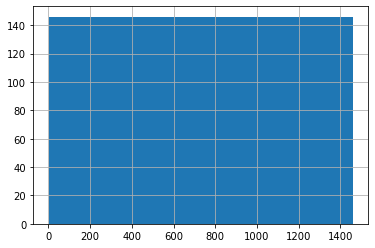

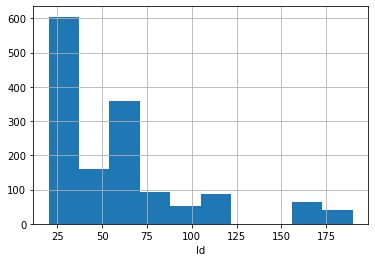

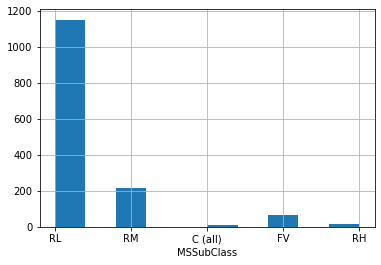

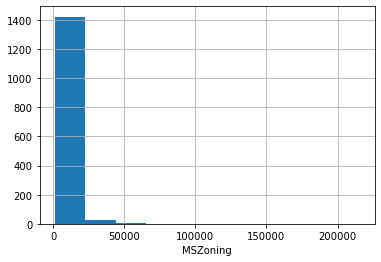

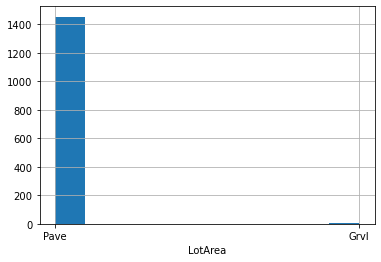

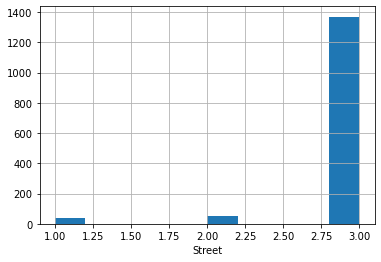

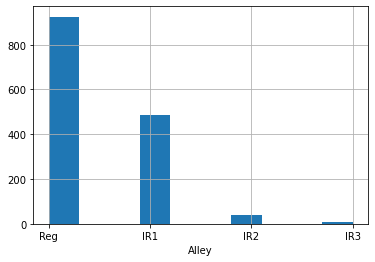

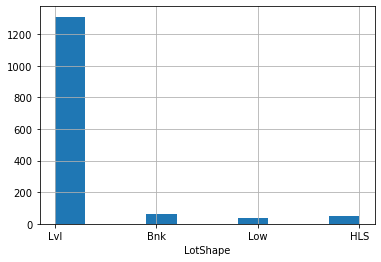

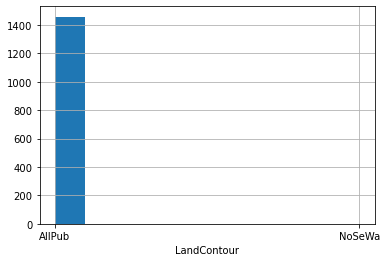

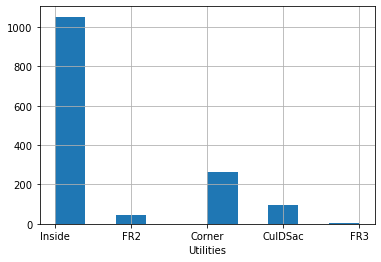

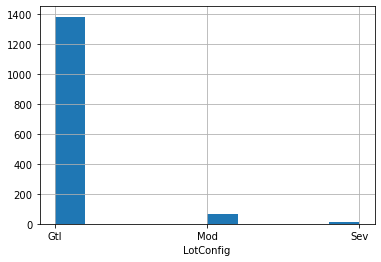

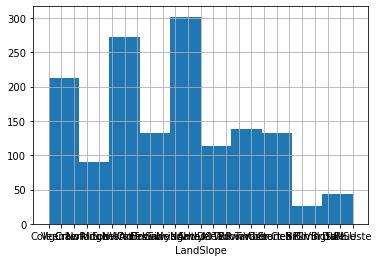

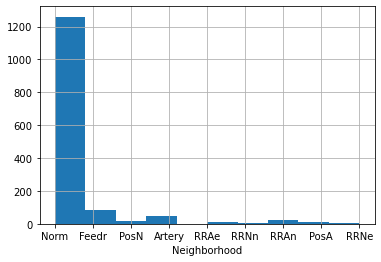

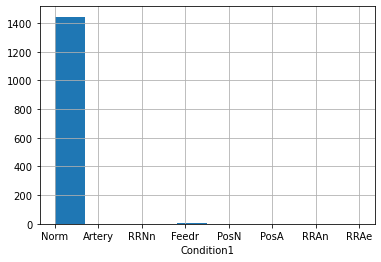

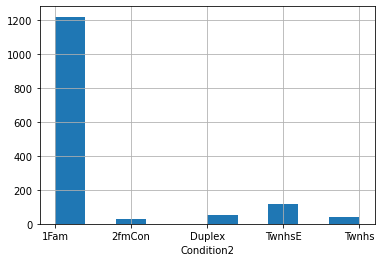

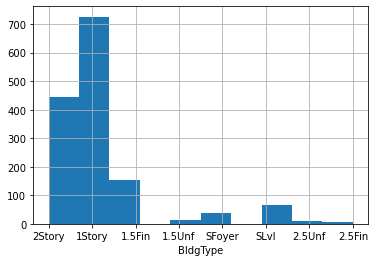

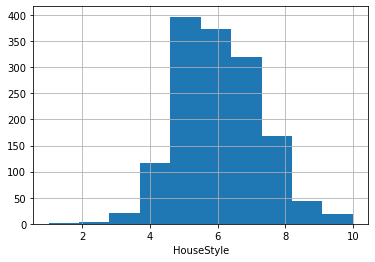

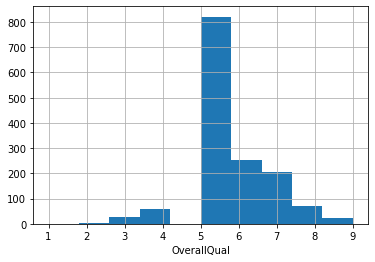

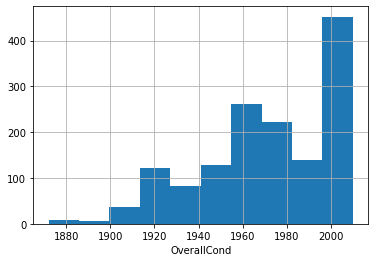

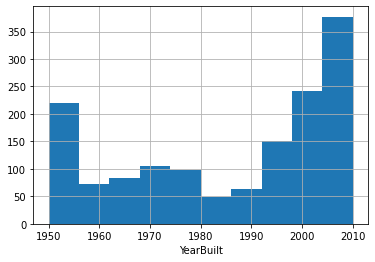

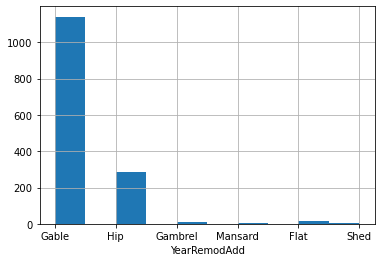

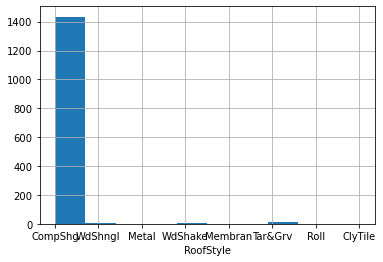

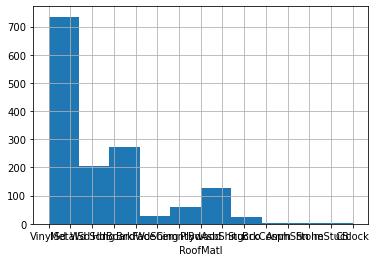

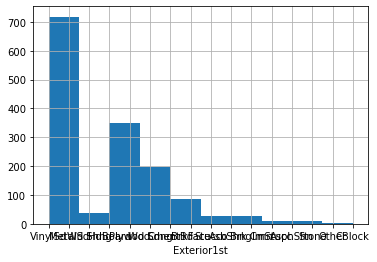

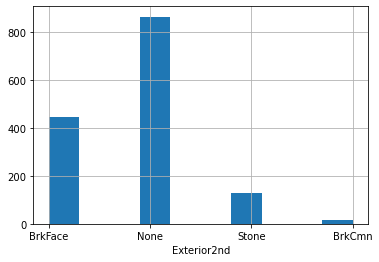

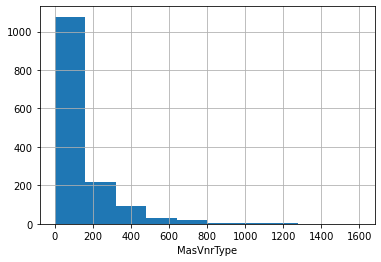

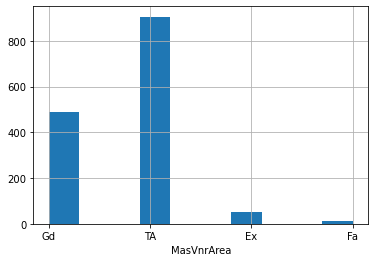

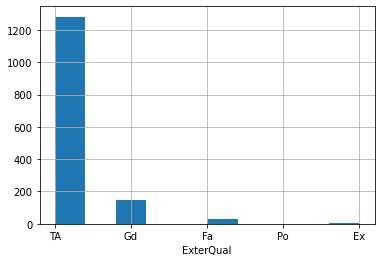

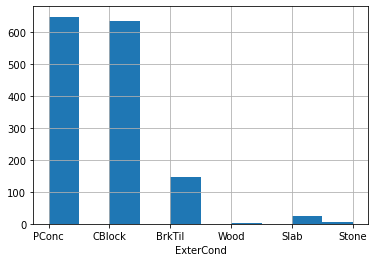

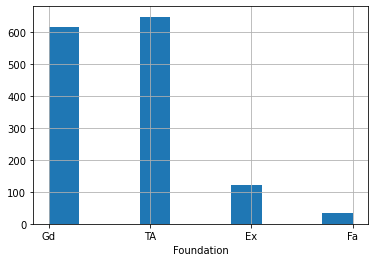

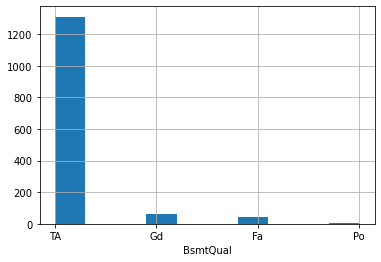

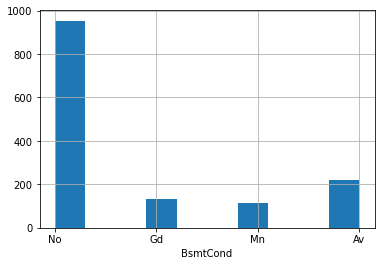

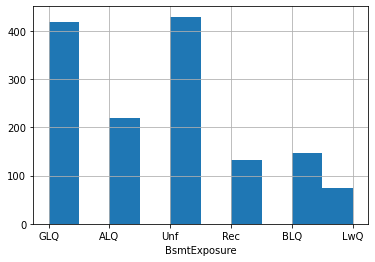

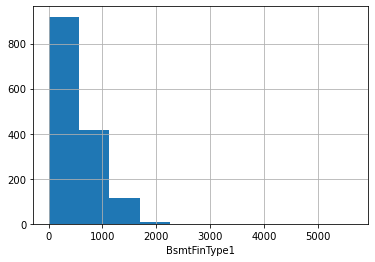

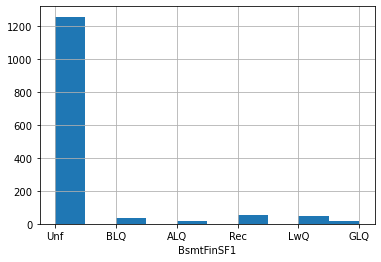

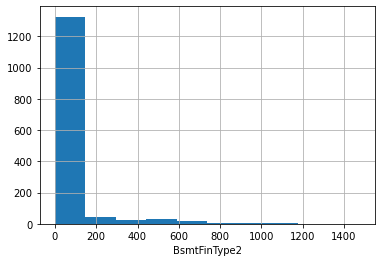

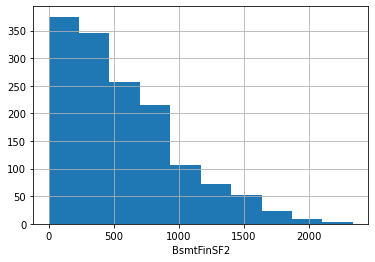

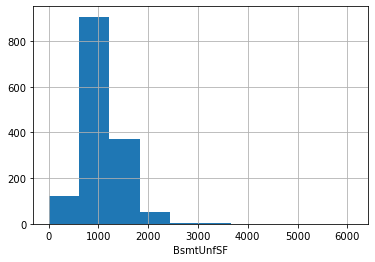

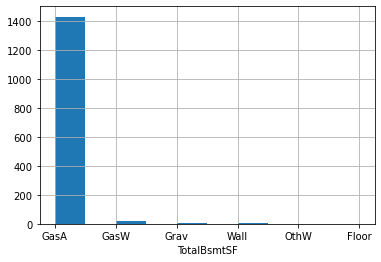

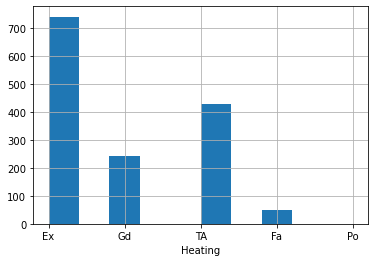

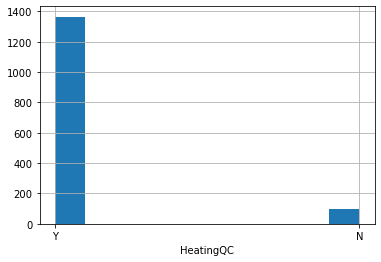

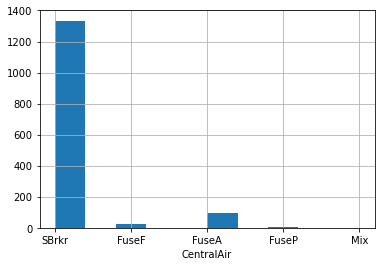

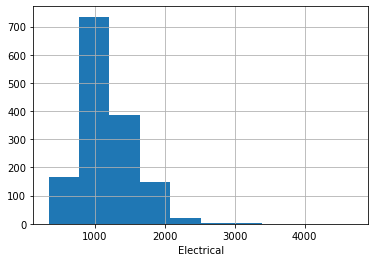

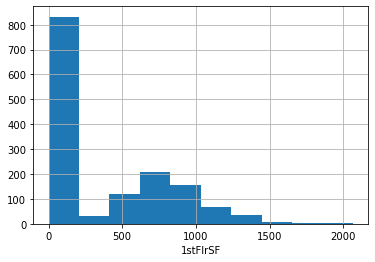

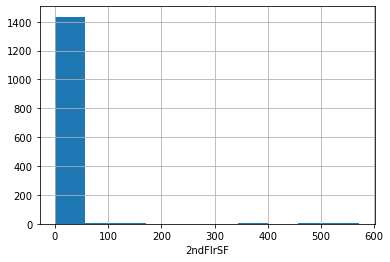

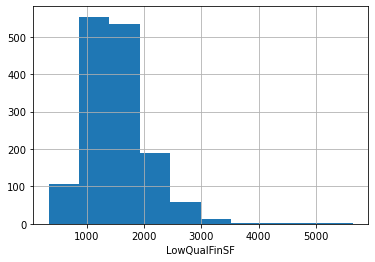

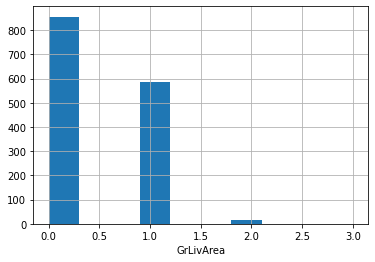

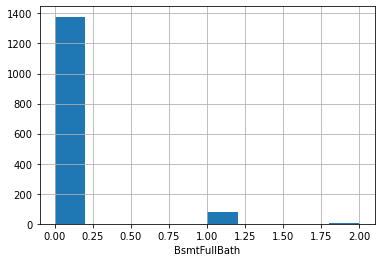

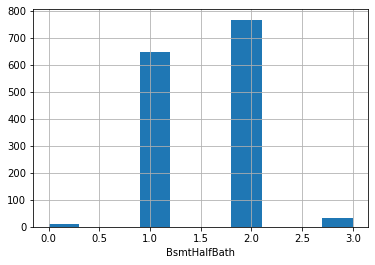

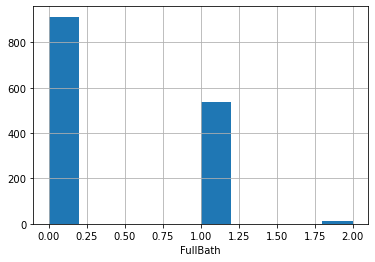

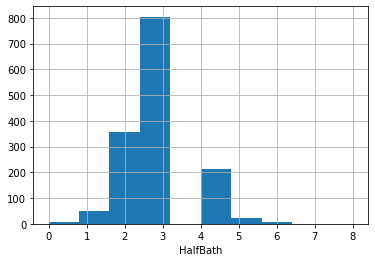

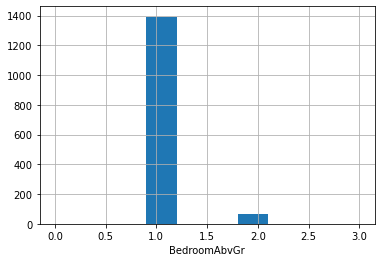

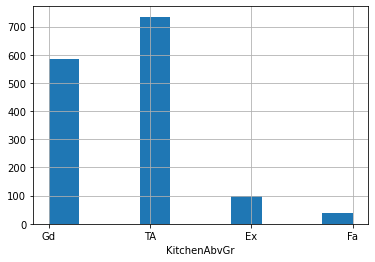

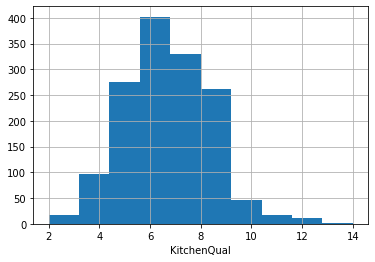

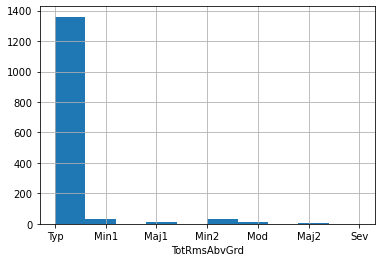

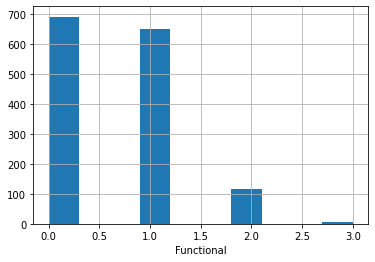

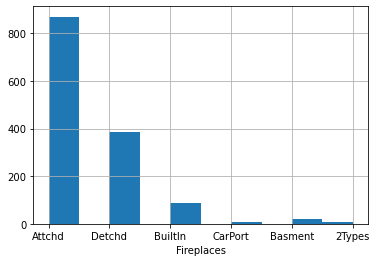

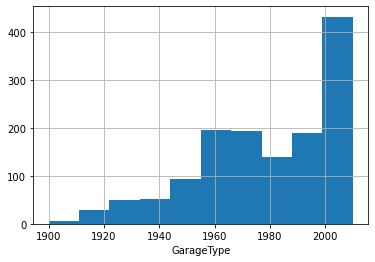

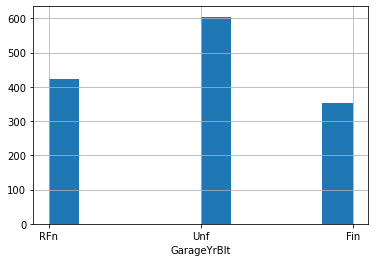

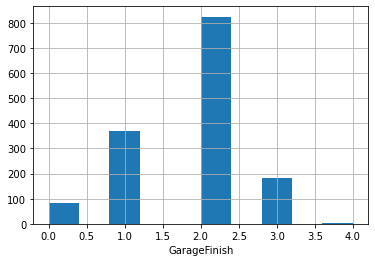

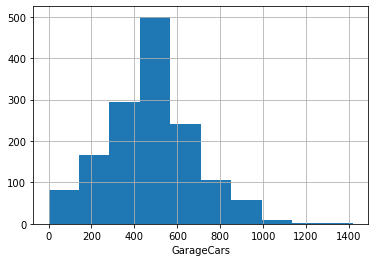

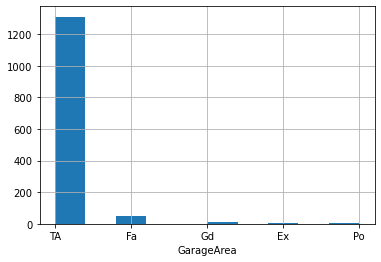

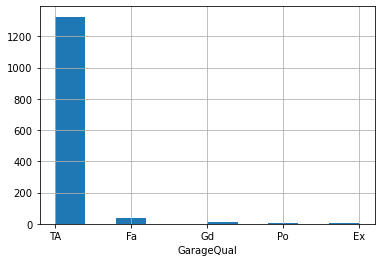

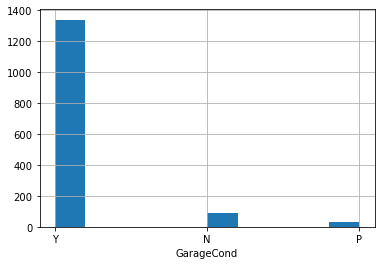

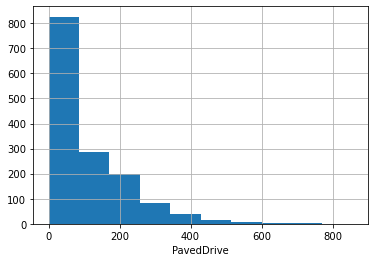

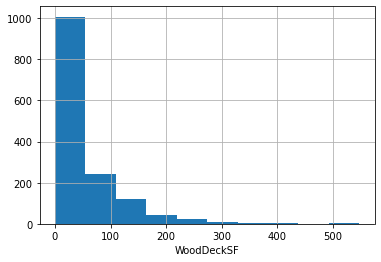

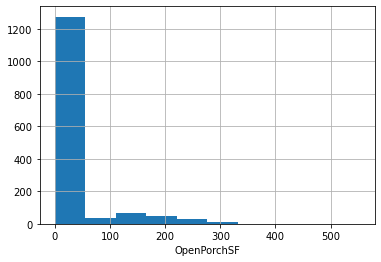

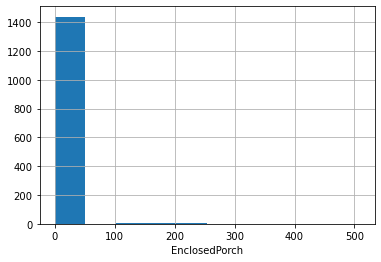

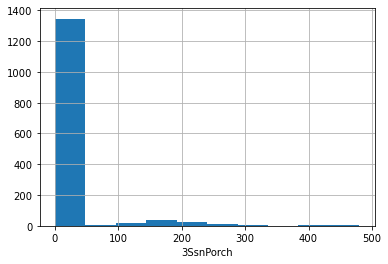

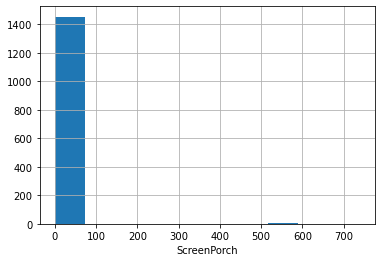

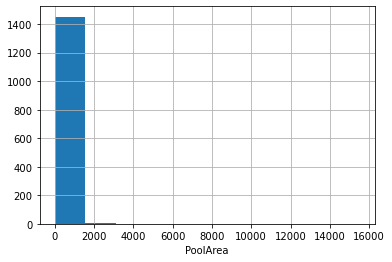

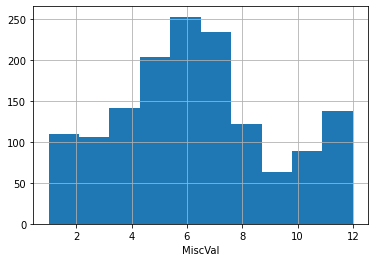

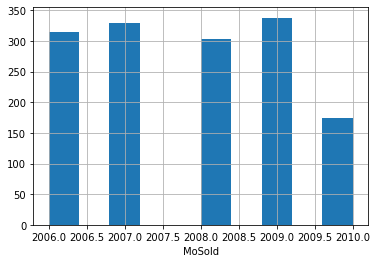

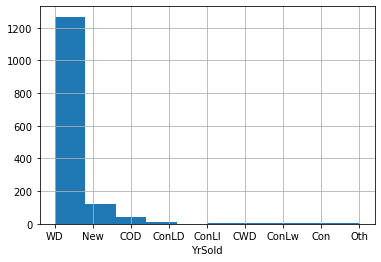

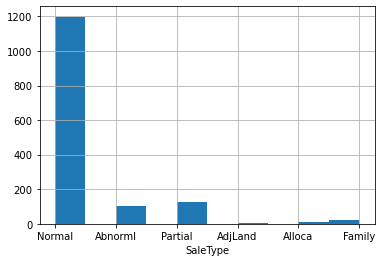

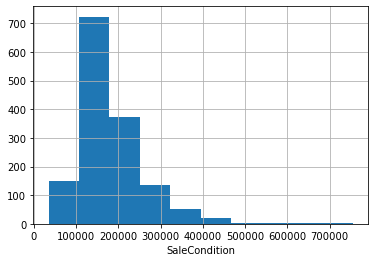

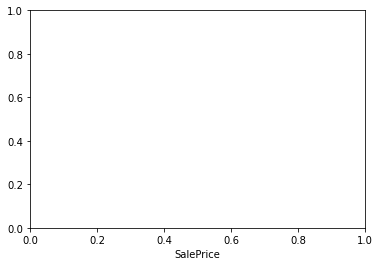

In [47]:
for i in data.columns:
    data[i].hist()
    plt.show()
    plt.xlabel(i)

In [48]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
Alley              int32
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [50]:
data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [52]:
data['MSZoning'] = np.where(data['MSZoning'] == 'RL', 1, 
                           np.where(data['MSZoning'] == 'RM', 2, 
                                   np.where(data['MSZoning'] == 'C (all)', 3, 
                                           np.where(data['MSZoning'] == 'FV', 4, 
                                                   np.where(data['MSZoning'] == 'RH', 5, 'other')))))

In [73]:
data['MSZoning'].unique()
data['MSZoning'] = data['MSZoning'].astype('int')


In [54]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [55]:
data['Street'] = np.where(data['Street'] == 'Pave', 1,
                         np.where(data['Street'] == 'Grvl', 2, 'other'))

In [74]:
data['Street'].unique()
data['Street'] = data['Street'].astype('int')

In [59]:
data['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [60]:
data['LotShape'] = np.where(data['LotShape'] == 'Reg', 1,
                           np.where(data['LotShape'] == 'IR1', 2,
                                   np.where(data['LotShape'] == 'IR2', 3,
                                           np.where(data['LotShape'] == 'IR3', 4, 'other'))))

In [76]:
data['LotShape'].unique()
data['LotShape'] = data['LotShape'].astype('int')

In [64]:
data['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [65]:
data['LandContour'] = np.where(data['LandContour'] == 'Lvl', 1, 
                              np.where(data['LandContour'] == 'Bnk', 2, 
                                      np.where(data['LandContour'] == 'Low', 3,
                                              np.where(data['LandContour'] == 'HLS', 4, 'other'))))

In [77]:
data['LandContour'].unique()
data['LandContour'] = data['LandContour'].astype('int')

In [78]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotArea            int64
Street             int32
Alley              int32
LotShape           int32
LandContour        int32
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [70]:
data

array(['1', '2', '3', '4', '5'], dtype=object)

In [79]:
data['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

<AxesSubplot:>

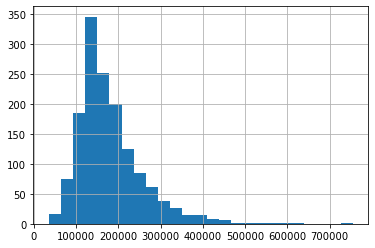

In [82]:
data['SalePrice'].hist(bins = 25)

In [85]:
# normalizamos la distribucion
data['SalePriceNorm'] = np.log(data['SalePrice'])

<AxesSubplot:>

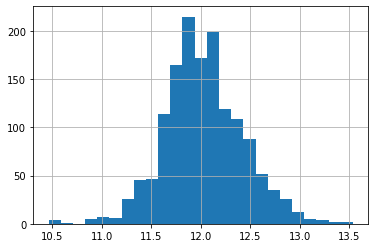

In [86]:
data['SalePriceNorm'].hist(bins = 25)

In [88]:
df_categoricas = data.select_dtypes(include=['object','category'])
df_numericas = data.select_dtypes(include='number')

In [95]:
df_categoricas.columns

Index(['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [97]:
anova = ols('SalePriceNorm ~ Utilities + LotConfig+ LandSlope+ Neighborhood+Condition1+Condition2+BldgType+HouseStyle+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinType2+Heating+HeatingQC+CentralAir+Electrical+KitchenQual+Functional+GarageType+GarageFinish+GarageQual+GarageCond+PavedDrive+SaleType+SaleCondition', data).fit()
sm.stats.anova_lm(anova_categoricas).head()

,df,sum_sq,mean_sq,F,PR(>F)
Utilities,1.0,0.053917,0.053917,2.142786,1.435127e-01
LotConfig,4.0,4.481067,1.120267,44.522373,8.307625e-35
LandSlope,2.0,0.489572,0.244786,9.728445,6.457462e-05
Neighborhood,24.0,103.915100,4.329796,172.077576,0.000000e+00
Condition1,8.0,1.708732,0.213592,8.488695,2.838965e-11


In [101]:
confianza = round((1 - sm.stats.anova_lm(anova_categoricas)[['PR(>F)']].sort_values(by = 'PR(>F)')).rename(columns = {'PR(>F)':'Confianza'})*100, 2)
confianza[confianza['Confianza'] == 100].index

Index(['Neighborhood', 'Exterior1st', 'ExterQual', 'BldgType', 'LotConfig',
       'MasVnrType', 'HouseStyle', 'BsmtQual', 'RoofStyle', 'BsmtExposure',
       'KitchenQual', 'CentralAir', 'RoofMatl', 'Foundation', 'Condition1',
       'Condition2', 'HeatingQC', 'BsmtFinType1', 'GarageType', 'ExterCond'],
      dtype='object')

In [104]:
columnas_relevantes = ['Neighborhood', 'Exterior1st', 'ExterQual', 'BldgType', 'LotConfig',
       'MasVnrType', 'HouseStyle', 'BsmtQual', 'RoofStyle', 'BsmtExposure',
       'KitchenQual', 'CentralAir', 'RoofMatl', 'Foundation', 'Condition1',
       'Condition2', 'HeatingQC', 'BsmtFinType1', 'GarageType', 'ExterCond']
df_numericas.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SalePriceNorm'],
      dtype='object')

In [106]:
data_new = data[['Neighborhood', 'Exterior1st', 'ExterQual', 'BldgType', 'LotConfig',
       'MasVnrType', 'HouseStyle', 'BsmtQual', 'RoofStyle', 'BsmtExposure',
       'KitchenQual', 'CentralAir', 'RoofMatl', 'Foundation', 'Condition1',
       'Condition2', 'HeatingQC', 'BsmtFinType1', 'GarageType', 'ExterCond',  'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SalePriceNorm']]

In [107]:
data_new

,Neighborhood,Exterior1st,ExterQual,BldgType,LotConfig,MasVnrType,HouseStyle,BsmtQual,RoofStyle,BsmtExposure,KitchenQual,CentralAir,RoofMatl,Foundation,Condition1,Condition2,HeatingQC,BsmtFinType1,GarageType,ExterCond,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePriceNorm
0,CollgCr,VinylSd,Gd,1Fam,Inside,BrkFace,2Story,Gd,Gable,No,Gd,Y,CompShg,PConc,Norm,Norm,Ex,GLQ,Attchd,TA,60,1,8450,1,3,1,1,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,Veenker,MetalSd,TA,1Fam,FR2,None,1Story,Gd,Gable,Gd,TA,Y,CompShg,CBlock,Feedr,Norm,Ex,ALQ,Attchd,TA,20,1,9600,1,3,1,1,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,CollgCr,VinylSd,Gd,1Fam,Inside,BrkFace,2Story,Gd,Gable,Mn,Gd,Y,CompShg,PConc,Norm,Norm,Ex,GLQ,Attchd,TA,60,1,11250,1,3,2,1,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,Crawfor,Wd Sdng,TA,1Fam,Corner,None,2Story,TA,Gable,No,Gd,Y,CompShg,BrkTil,Norm,Norm,Gd,ALQ,Detchd,TA,70,1,9550,1,3,2,1,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,NoRidge,VinylSd,Gd,1Fam,FR2,BrkFace,2Story,Gd,Gable,Av,Gd,Y,CompShg,PConc,Norm,Norm,Ex,GLQ,Attchd,TA,60,1,14260,1,3,2,1,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,VinylSd,TA,1Fam,Inside,None,2Story,Gd,Gable,No,TA,Y,CompShg,PConc,Norm,Norm,Ex,Unf,Attchd,TA,60,1,7917,1,3,1,1,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,12.072541
1456,NWAmes,Plywood,TA,1Fam,Inside,Stone,1Story,Gd,Gable,No,TA,Y,CompShg,CBlock,Norm,Norm,TA,ALQ,Attchd,TA,20,1,13175,1,3,1,1,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,12.254863
1457,Crawfor,CemntBd,Ex,1Fam,Inside,None,2Story,TA,Gable,No,Gd,Y,CompShg,Stone,Norm,Norm,Ex,GLQ,Attchd,Gd,70,1,9042,1,3,1,1,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,12.493130
1458,NAmes,MetalSd,TA,1Fam,Inside,None,1Story,TA,Hip,Mn,Gd,Y,CompShg,CBlock,Norm,Norm,Gd,GLQ,Attchd,TA,20,1,9717,1,3,1,1,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,11.864462


In [108]:
data_new.dtypes

Neighborhood      object
Exterior1st       object
ExterQual         object
BldgType          object
LotConfig         object
MasVnrType        object
HouseStyle        object
BsmtQual          object
RoofStyle         object
BsmtExposure      object
KitchenQual       object
CentralAir        object
RoofMatl          object
Foundation        object
Condition1        object
Condition2        object
HeatingQC         object
BsmtFinType1      object
GarageType        object
ExterCond         object
MSSubClass         int64
MSZoning           int32
LotArea            int64
Street             int32
Alley              int32
LotShape           int32
LandContour        int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64


In [115]:
X = sm.add_constant(pd.get_dummies(data_new['Neighborhood']))
y = data_new['SalePriceNorm']
model = sm.OLS(y, X).fit()
print_modelo1 = model.summary()
print(print_modelo1)

                            OLS Regression Results                            
Dep. Variable:          SalePriceNorm   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     79.52
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          4.04e-243
Time:                        12:11:41   Log-Likelihood:                -113.89
No. Observations:                1460   AIC:                             277.8
Df Residuals:                    1435   BIC:                             409.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5674      0.011   1021.785      0.0

In [117]:
X = sm.add_constant(data_new['MSZoning'])
y = data_new['SalePriceNorm']
model = sm.OLS(y, X).fit()
print_modelo1 = model.summary()
print(print_modelo1)

                            OLS Regression Results                            
Dep. Variable:          SalePriceNorm   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     28.53
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.07e-07
Time:                        12:15:56   Log-Likelihood:                -717.22
No. Observations:                1460   AIC:                             1438.
Df Residuals:                    1458   BIC:                             1449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1170      0.020    598.503      0.0

In [120]:
X = sm.add_constant(data_new['GrLivArea'])
y = data_new['SalePriceNorm']
model = sm.OLS(y, X).fit()
print_modelo1 = model.summary()
print(print_modelo1)

                            OLS Regression Results                            
Dep. Variable:          SalePriceNorm   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1408.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          3.06e-216
Time:                        12:17:09   Log-Likelihood:                -237.96
No. Observations:                1460   AIC:                             479.9
Df Residuals:                    1458   BIC:                             490.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2166      0.023    492.511      0.0

In [121]:
X = sm.add_constant(pd.get_dummies(data_new['YearRemodAdd']))
y = data_new['SalePriceNorm']
model = sm.OLS(y, X).fit()
print_modelo1 = model.summary()
print(print_modelo1)

                            OLS Regression Results                            
Dep. Variable:          SalePriceNorm   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     13.27
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.52e-98
Time:                        12:19:06   Log-Likelihood:                -402.40
No. Observations:                1460   AIC:                             926.8
Df Residuals:                    1399   BIC:                             1249.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7970      0.011   1033.469      0.0

In [122]:
# Neighborhood es la variable mas importante dentro del Dataset

In [125]:
corr = data_new.corr()
corr_sales = corr['SalePriceNorm'].sort_values(ascending=False)
corr_sales

SalePriceNorm    1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotShape         0.286002
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
Alley            0.091145
LandContour      0.076856
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
Street          -0.057369
MSSubClass  

In [128]:
anova_2 =  ols('SalePriceNorm ~ Neighborhood + OverallQual', data_new).fit()
sm.stats.anova_lm(anova_2).head()

,df,sum_sq,mean_sq,F,PR(>F)
Neighborhood,24.0,132.884425,5.536851,140.052079,0.000000e+00
OverallQual,1.0,43.224149,43.224149,1093.334788,1.100729e-178
Residual,1434.0,56.692085,0.039534,NaN,NaN


In [152]:
data_new_filtered = data[['OverallQual','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd','TotRmsAbvGrd','Neighborhood']]

In [153]:
data_final = pd.get_dummies(data_new_filtered, columns = ['OverallQual', 'Neighborhood'])

In [154]:
data_final.isna().any(axis =1).unique()


array([False])

In [155]:
x = sm.add_constant(data_final)
y = data['SalePrice']

In [156]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:03:24   Log-Likelihood:                -17244.
No. Observations:                1460   AIC:                         3.457e+04
Df Residuals:                    1420   BIC:                         3.478e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.083e+05   1.37e+05     -6.611      0.000   -1.18e+06   -6.39e+05
GrLivArea               51.1299      3.795     13.472      0.000      43.685      58.575
GarageCars            1.224e+04   1637.459      7.477      0.000    9030.733    1.55e+04
FullBath             -1362.8161   2470.543     -0.552      0.581   -6209.123    3483.491
YearBuilt              254.9062     67.960      3.751      0.000     121.593     388.219
YearRemodAdd           319.3506     57.835      5.522      0.000     205.899     432.802
TotRmsAbvGrd          -669.5191   1010.580     -0.663      0.508   -2651.910    1312.872
OverallQual_1        -1.394e+05    2.5e+04     -5.578      0.000   -1.88e+05   -9.04e+04
OverallQual_2        -1.421e+05   2.22e+04     -6.389      0.000   -1.86e+05   -9.85e+04
OverallQual_3        -1.396e+05    1.5e+04     -9.315      0.000   -1.69e+05    -1.1e+05
OverallQual_4        -1.256e+05   1.39e+04     -9.022      0.000   -1.53e+05   -9.83e+04
OverallQual_5        -1.195e+05   1.39e+04     -8.579      0.000   -1.47e+05   -9.22e+04
OverallQual_6        -1.135e+05   1.42e+04     -7.983      0.000   -1.41e+05   -8.56e+04
OverallQual_7        -9.962e+04   1.47e+04     -6.765      0.000   -1.29e+05   -7.07e+04
OverallQual_8        -6.846e+04   1.51e+04     -4.521      0.000   -9.82e+04   -3.88e+04
OverallQual_9         4638.4983   1.61e+04      0.288      0.773   -2.69e+04    3.62e+04
OverallQual_10        3.485e+04   1.72e+04      2.023      0.043    1059.797    6.86e+04
Neighborhood_Blmngtn -4.934e+04   1.07e+04     -4.601      0.000   -7.04e+04   -2.83e+04
Neighborhood_Blueste -6.764e+04   2.33e+04     -2.908      0.004   -1.13e+05    -2.2e+04
Neighborhood_BrDale  -7.137e+04   9862.748     -7.237      0.000   -9.07e+04    -5.2e+04
Neighborhood_BrkSide -3.938e+04   5946.819     -6.623      0.000   -5.11e+04   -2.77e+04
Neighborhood_ClearCr -8342.5882   8235.351     -1.013      0.311   -2.45e+04    7812.172
Neighborhood_CollgCr -3.618e+04   7502.407     -4.822      0.000   -5.09e+04   -2.15e+04
Neighborhood_Crawfor -7368.2313   6323.841     -1.165      0.244   -1.98e+04    5036.843
Neighborhood_Edwards -5.429e+04   6167.853     -8.803      0.000   -6.64e+04   -4.22e+04
Neighborhood_Gilbert -4.503e+04   7971.990     -5.648      0.000   -6.07e+04   -2.94e+04
Neighborhood_IDOTRR  -5.432e+04   6754.662     -8.042      0.000   -6.76e+04   -4.11e+04
Neighborhood_MeadowV -6.462e+04   1.01e+04     -6.406      0.000   -8.44e+04   -4.48e+04
Neighborhood_Mitchel -4.257e+04   7788.277     -5.466      0.000   -5.79e+04   -2.73e+04
Neighborhood_NAmes   -3.831e+04   5632.729     -6.801      0.000   -4.94e+04   -2.73e+04
Neighborhood_NPkVill -5.241e+04   1.21e+04     -4.348      0.000   -7.61e+04   -2.88e+04
Neighborhood_NWAmes  -3.725e+04   6805.875     -5.473    

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


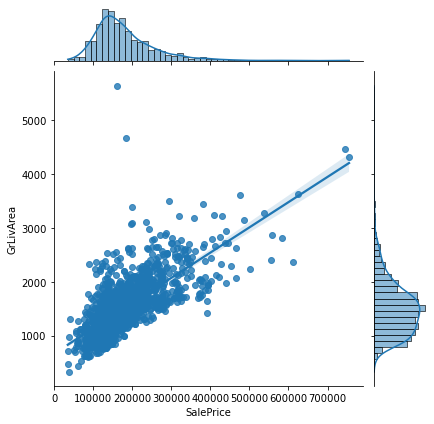

In [163]:
sns.jointplot(data_new['SalePrice'], data_new['GrLivArea'], kind = 'reg')

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


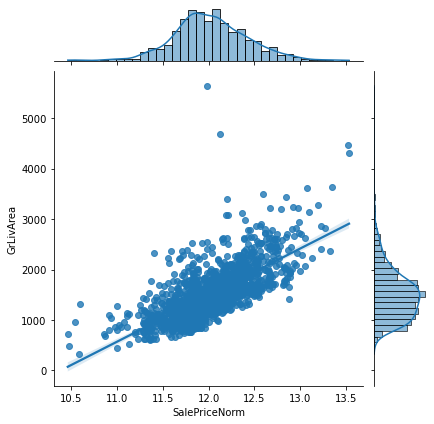

In [164]:
sns.jointplot(data_new['SalePriceNorm'], data_new['GrLivArea'], kind = 'reg')

After obtaining an R2 for the model of 0.83 we can infer that the model explains pretty well the data, so it means it is relevant

Also we found that the most important variable to determine the value of a house is the Neighborhood

In order to predict new values for the houses we can use this last model and fill it with the variables to have an approximate house value